In [1]:
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)

#reading data

data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()



(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
#collecting x and y values
X= data['Head Size(cm^3)'].values
Y= data['Brain Weight(grams)'].values


In [3]:
#MEAN OF X AND Y
mean_x= np.mean(X)
mean_y= np.mean(Y)

# calculation of slope(b1) and intercept(b0) values
m=len(X)
denom=0
numer=0
for i in range(m):
    numer+=((X[i]-mean_x)*(Y[i]-mean_y))
    denom+=(X[i]-mean_x)**2
b1= numer/denom
b0= mean_y-(mean_x*b1)
print('coefficients:',b0,b1)

    
    

coefficients: 325.57342104944223 0.26342933948939945


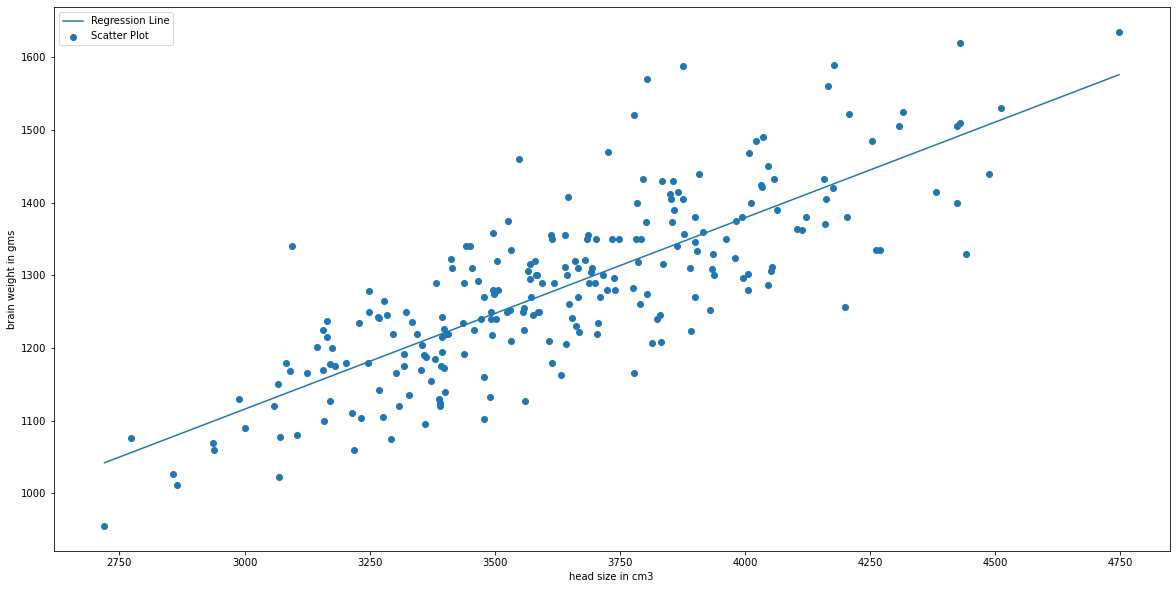

In [6]:
# plotting the regression line
max_x=np.max(X) 
min_x=np.min(X)
x=np.linspace(min_x,max_x,500)
y=b0+b1*x
plt.plot(x,y,label="Regression Line")
plt.scatter(X,Y,label="Scatter Plot")
plt.xlabel('head size in cm3')
plt.ylabel('brain weight in gms')
plt.legend()
plt.show()



In [8]:
# R-squared value
sst=0
ssr=0
for i in range(m):
    y_pred=b0+b1*X[i]
    sst+=(Y[i]-mean_y)**2
    ssr+=(Y[i]-y_pred)**2
r2=1-(ssr/sst)
print(r2)

0.6393117199570003


In [15]:
## Linear Regression using scikit learn library
from sklearn.linear_model import LinearRegression

X= X.reshape(m,1)# can not use rank 1 matrix in scikit learn
reg=LinearRegression() #creating model
reg=reg.fit(X,Y) # fitting training data
Y_pred= reg.predict(X) #Y prediction
r2_score=reg.score(X,Y)
print(r2_score)




0.639311719957
